In [1]:
import re
import pickle
import string
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss, log_loss

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
train = pd.read_csv('Toxic_Multi/train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
train.shape

(159571, 8)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
# checking for any null values
train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [6]:
train[train['comment_text'] == " "]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate


In [7]:
cols = train.iloc[:, 2:].columns
cols

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [8]:
for col in cols:
    print(f"\n{train[col].value_counts(normalize = True)}")


0    0.904156
1    0.095844
Name: toxic, dtype: float64

0    0.990004
1    0.009996
Name: severe_toxic, dtype: float64

0    0.947052
1    0.052948
Name: obscene, dtype: float64

0    0.997004
1    0.002996
Name: threat, dtype: float64

0    0.950636
1    0.049364
Name: insult, dtype: float64

0    0.991195
1    0.008805
Name: identity_hate, dtype: float64


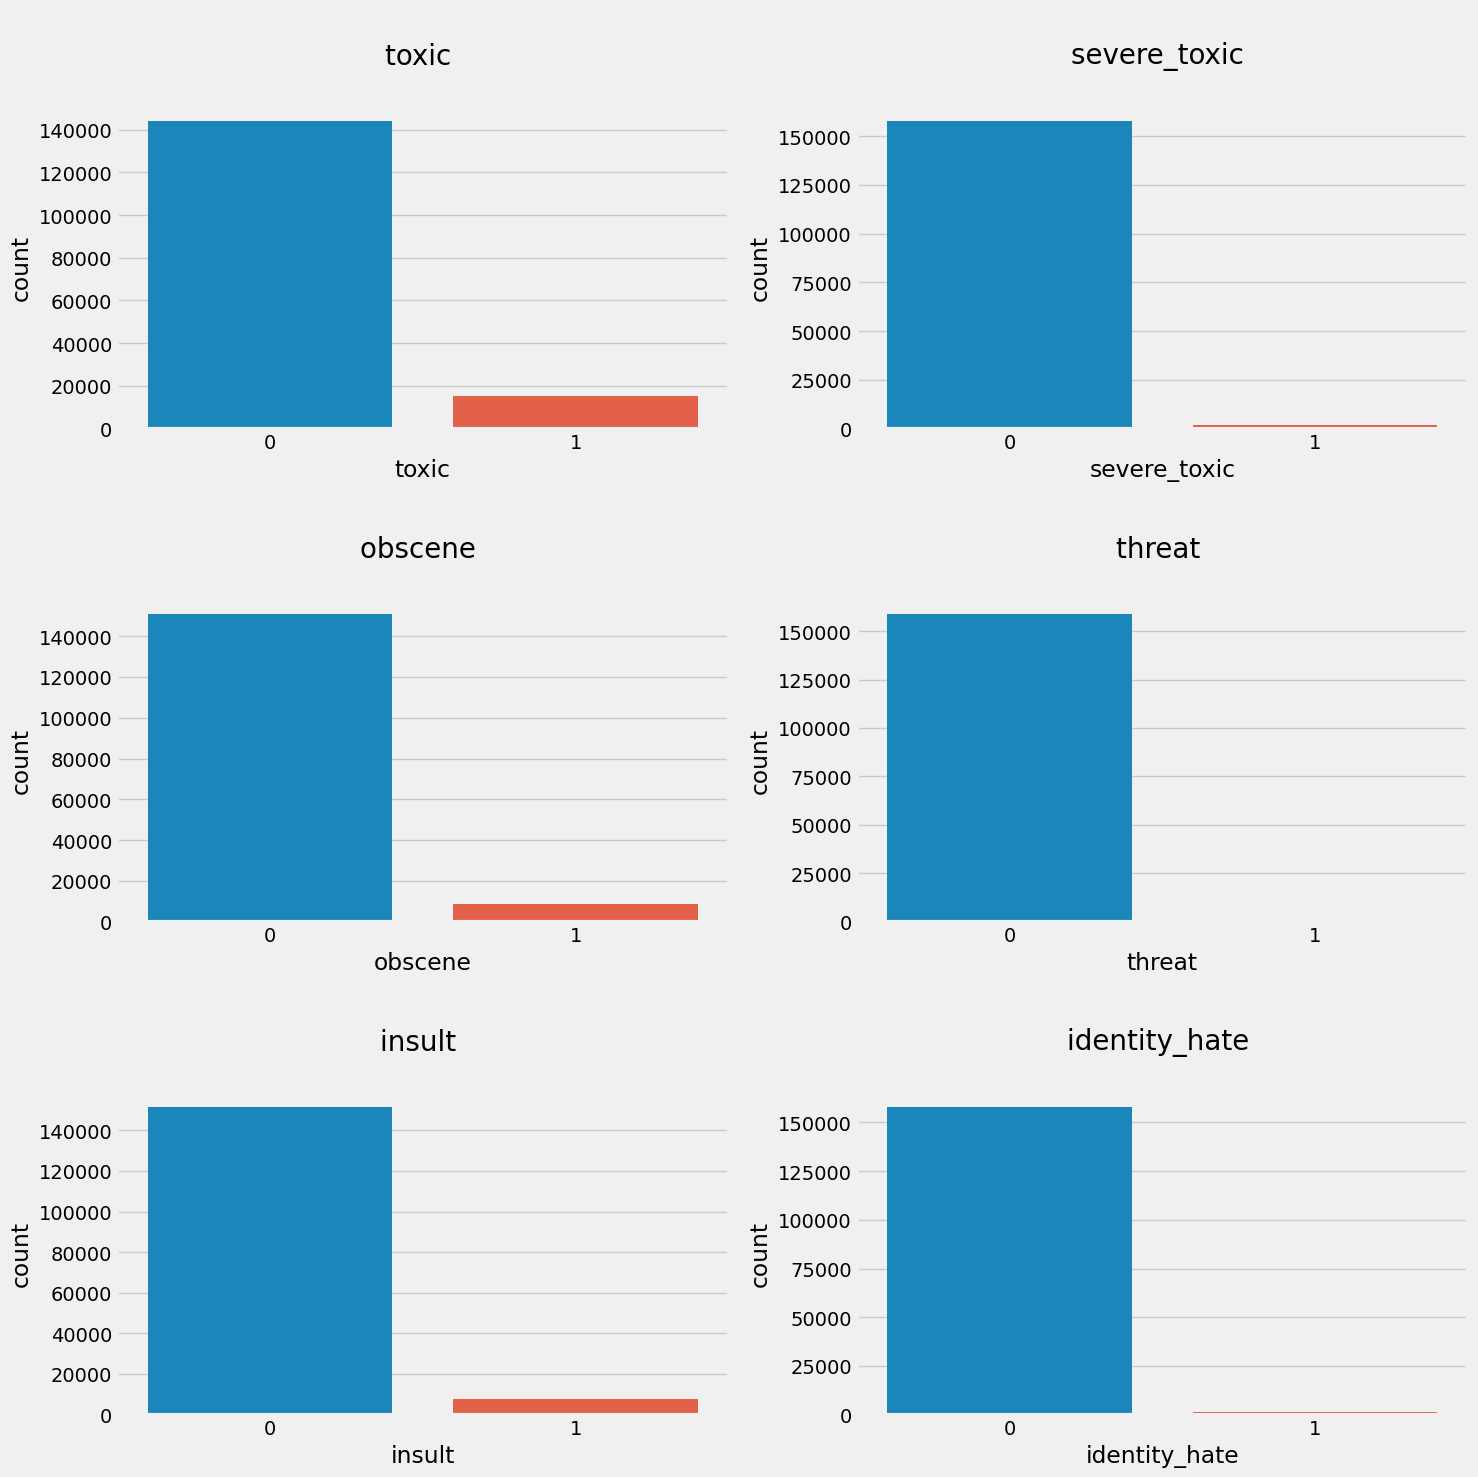

In [9]:
plt.figure(figsize = (15, 15))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 6:
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(x = cols[i], data = train, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [10]:
distribution_df = pd.DataFrame(train[train.iloc[:, 2:].columns].sum())
distribution_df.columns = ['count']
distribution_df

,count
toxic,15294
severe_toxic,1595
obscene,8449
threat,478
insult,7877
identity_hate,1405


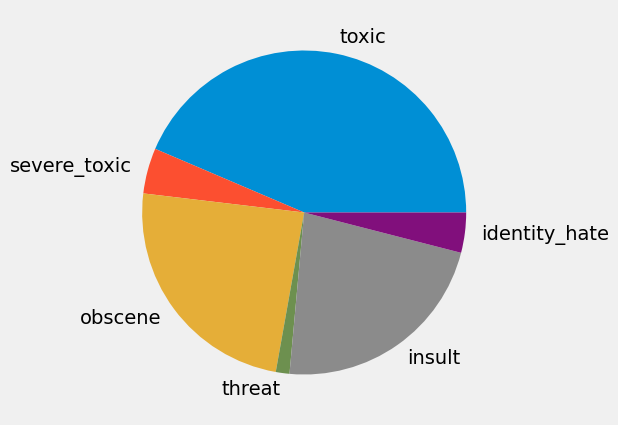

In [11]:
plt.figure(figsize = (5, 5))
plt.pie(x = 'count', data = distribution_df, labels = distribution_df.index)

plt.show()

- toxic, innsult and obscene are major labels

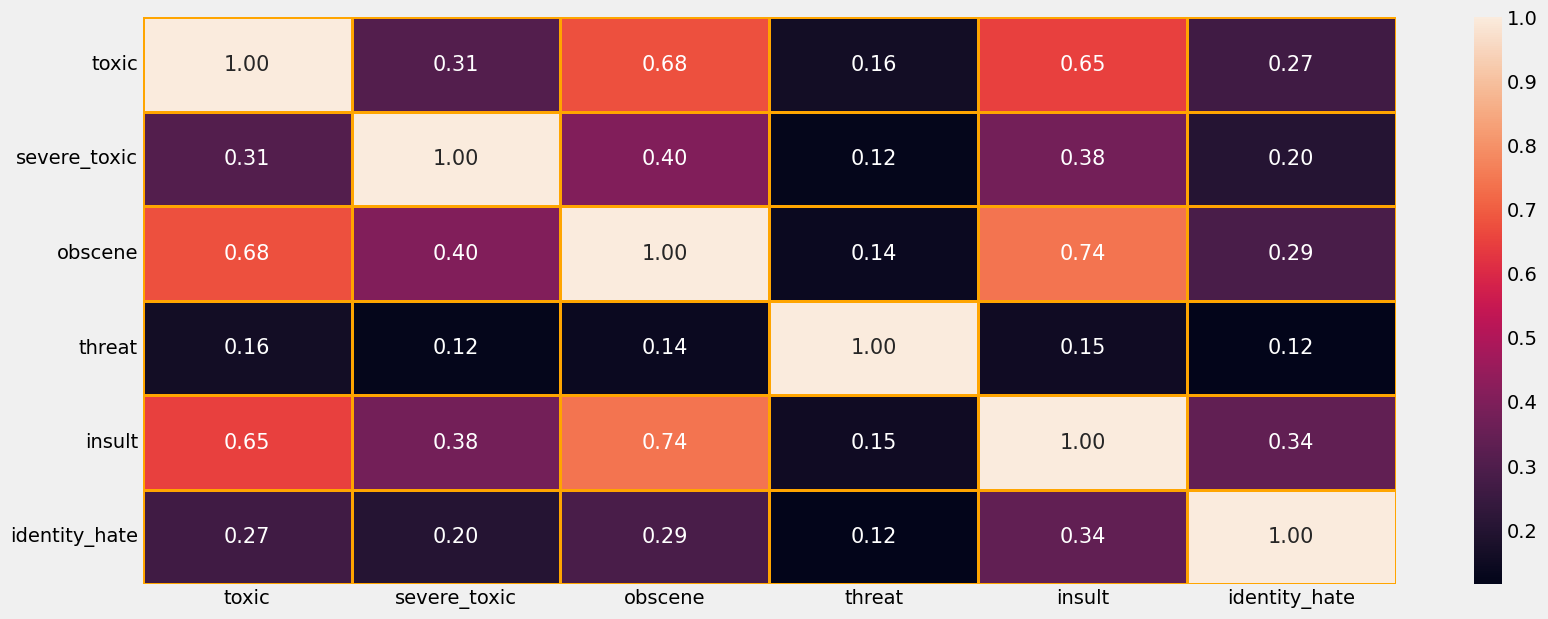

In [12]:
# heatmap of the data for checking the correlation.

plt.figure(figsize = (18, 7))

sns.heatmap(train.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')

plt.show()

In [13]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [14]:
import nltk
from nltk.corpus import stopwords
word_counter = {}

def clean_text(text):
    text = re.sub('[{}]'.format(string.punctuation), ' ', text.lower())
    return ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])

for category in train.iloc[:, 2:8].columns:
    d = Counter()
    
    train[train[category] == 1]['comment_text'].apply(lambda x: d.update(clean_text(x).split()))
    
    word_counter[category] = pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'count'}).sort_values('count', ascending=False)

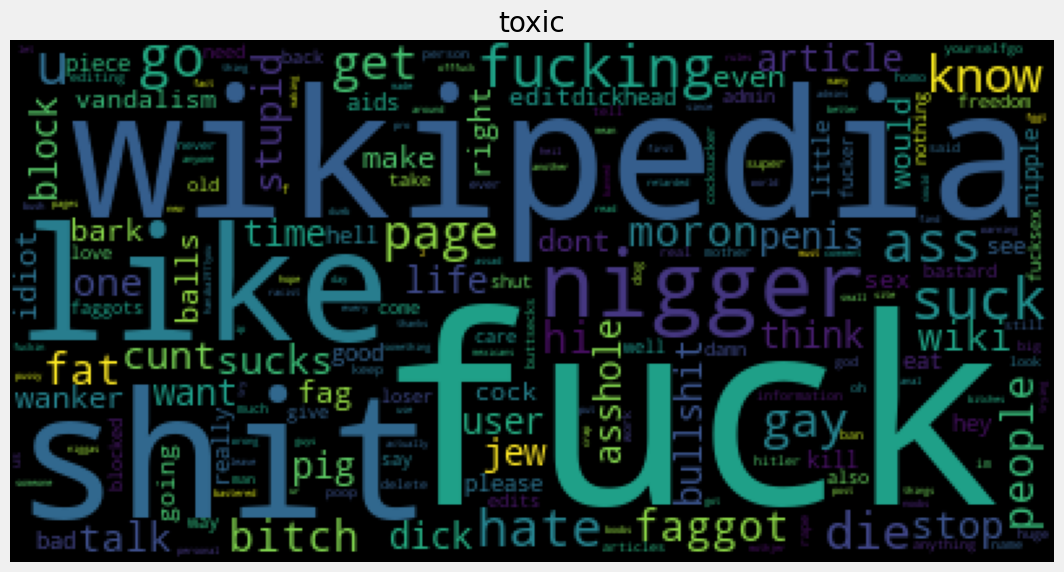

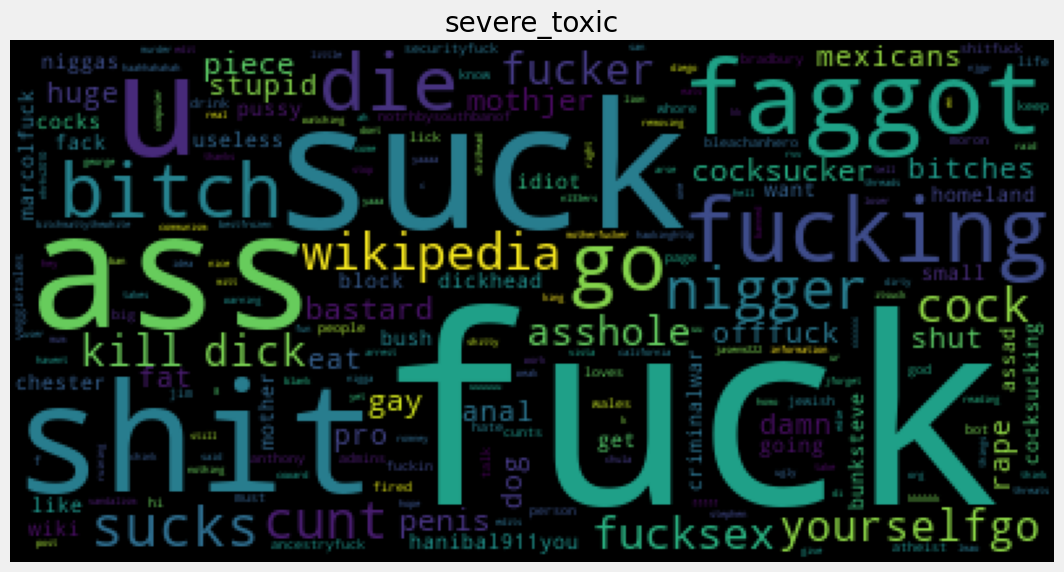

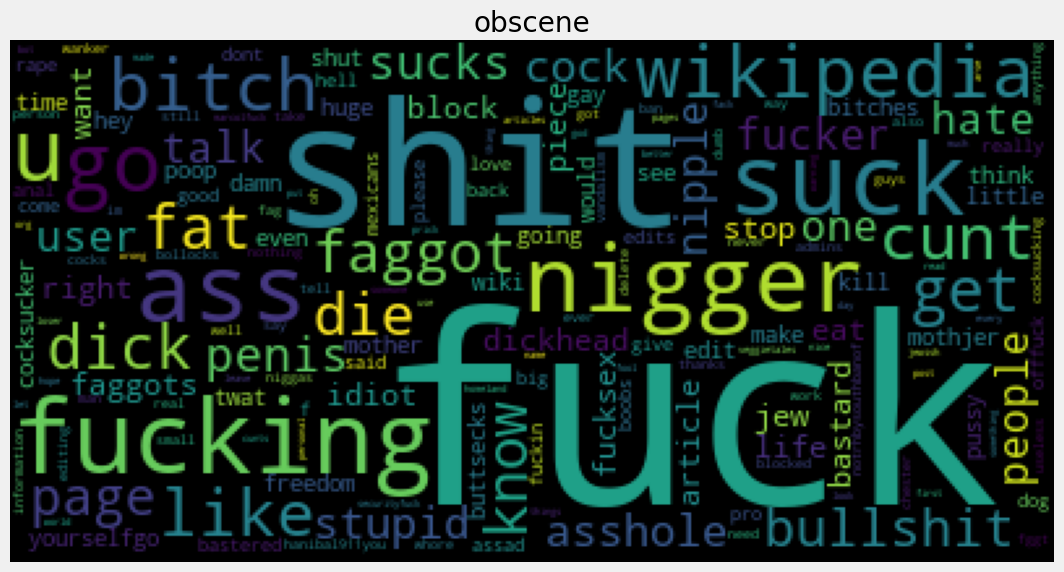

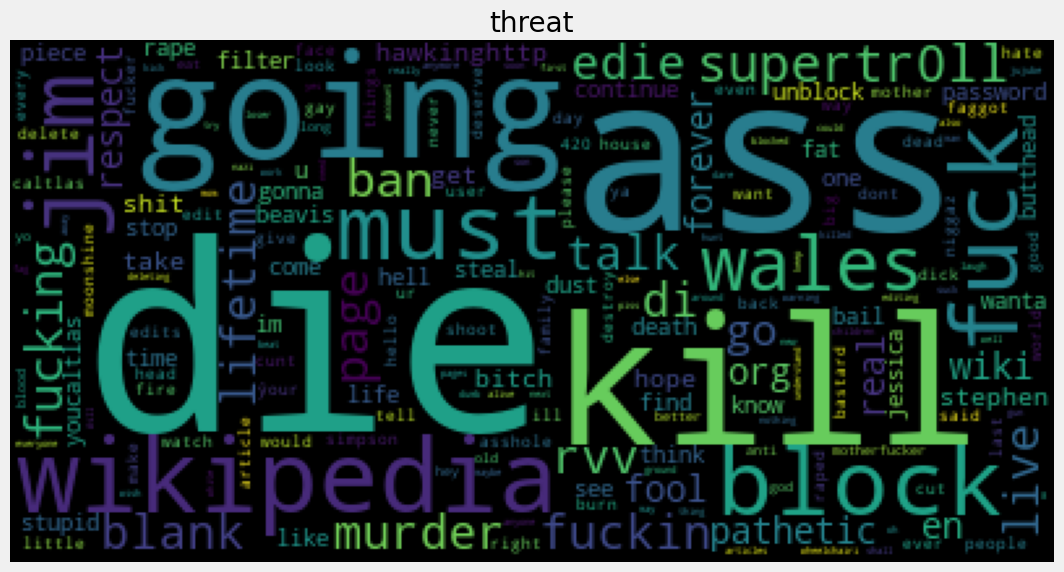

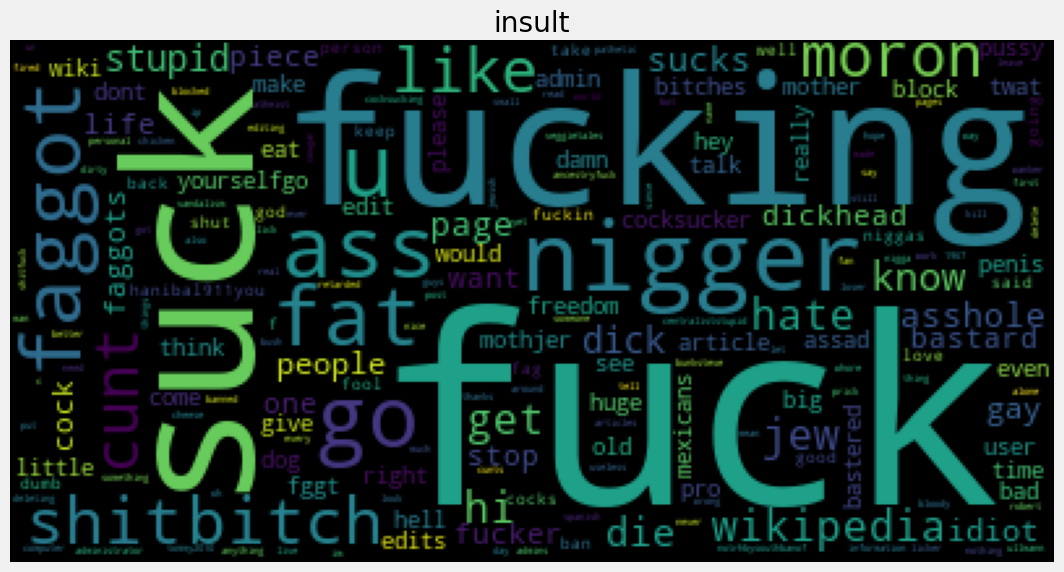

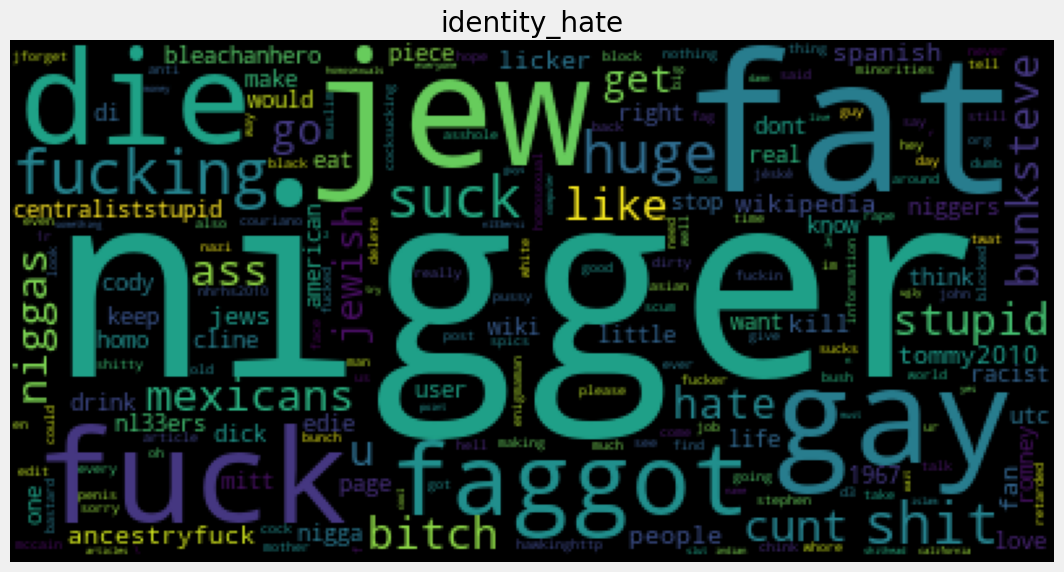

In [15]:
for w in word_counter:
    wc = word_counter[w]

    wordcloud = WordCloud(background_color='black',max_words=200,max_font_size=100, random_state=4561).generate_from_frequencies(wc.to_dict()['count'])

    fig = plt.figure(figsize=(12, 8))
    plt.title(w)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

In [16]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
import contractions

def contraction(text):
    text = contractions.fix(text)
    
    return text

In [18]:
train['comment_text'] = train['comment_text'].apply(contraction)

In [19]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I am ...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I am really not trying to edit war. I...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI cannot make any real suggestions on...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [20]:
def  clean_text(text):
    text =  text.lower()
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    return text

In [21]:
train['comment_text'] = train['comment_text'].apply(clean_text)

In [22]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i am ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i am really not trying to edit war i...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cannot make any real suggestions on i...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [23]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

wordnet = WordNetLemmatizer()

def lemmatizer(text):
    words =  text.split()
    train = [wordnet.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
    return ' '.join(train)

In [24]:
train['comment_text'] = train['comment_text'].apply(lemmatizer)

In [25]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cannot make real suggestion improvement wonder...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0


In [26]:
X =  train.comment_text
y =  train.drop(['id','comment_text'],axis = 1)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 45)

In [28]:
X_train = X_train.to_numpy()
X_test =  X_test.to_numpy()

In [29]:
y_train =  y_train.to_numpy()
y_test =  y_test.to_numpy()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorizer.fit(X_train)    
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

### Logistic Regression

In [31]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

lr = MultiOutputClassifier(LogisticRegression())
lr.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [32]:
# accuracy metrics

y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.924189115390469
Test Accuracy :- 0.9201412098930482
Precision :- 0.8664161262153819
Recall :- 0.5507924384189421
F1 Score :- 0.6684405502512858


Hamming Loss :- 0.01910650623885918
Log Loss :- 1.538891771275901


### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dc.predict(X_test)
y_train_pred = dc.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9987018684142204
Test Accuracy :- 0.8995863970588235
Precision :- 0.6631987279592341
Recall :- 0.6281267901470308
F1 Score :- 0.6444156028316677


Hamming Loss :- 0.024722175802139038
Log Loss :- 1.4904265296766268


### Random Forest Classifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
y_pred = rf.predict(X_test)
y_train_pred = rf.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9986302473612119
Test Accuracy :- 0.9172794117647058
Precision :- 0.8464608233470837
Recall :- 0.5329387053656673
F1 Score :- 0.6434638659177285


Hamming Loss :- 0.019931623217468806
Log Loss :- 1.6782884651052559


### MultinomialNB

In [37]:
from sklearn.naive_bayes import MultinomialNB

naive = MultiOutputClassifier(MultinomialNB())
naive.fit(X_train, y_train)

MultiOutputClassifier(estimator=MultinomialNB())

In [38]:
y_pred = naive.predict(X_test)
y_train_pred = naive.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9010823731635914
Test Accuracy :- 0.9007561831550802
Precision :- 0.8786327932375875
Recall :- 0.12974985678823753
F1 Score :- 0.2225520983053387


Hamming Loss :- 0.031817485516934044
Log Loss :- 1.531697014969768


### XGBoost

In [31]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9485671313082481
Test Accuracy :- 0.9200994318181818
Precision :- 0.8217453998751487
Recall :- 0.621443574565591
F1 Score :- 0.7053256689816867


Hamming Loss :- 0.01837887143493761
Log Loss :- 1.3792924587623163


### LightGBM

In [41]:
from lightgbm import LGBMClassifier

lgbm = MultiOutputClassifier(LGBMClassifier())
lgbm.fit(X_train, y_train)

MultiOutputClassifier(estimator=LGBMClassifier())

In [42]:
y_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train) 

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9485671313082481
Test Accuracy :- 0.9200994318181818
Precision :- 0.8217453998751487
Recall :- 0.621443574565591
F1 Score :- 0.7053256689816867


Hamming Loss :- 0.01837887143493761
Log Loss :- 1.3792924587623163


In [43]:
from sklearn.ensemble import GradientBoostingClassifier

gb = MultiOutputClassifier(GradientBoostingClassifier())
gb.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [44]:
y_pred = gb.predict(X_test)
y_train_pred = gb.predict(X_train)

print(f"Training Accuracy :- {accuracy_score(y_train, y_train_pred)}")
print(f"Test Accuracy :- {accuracy_score(y_test, y_pred)}")
print(f"Precision :- {precision_score(y_test, y_pred, average = 'weighted')}")
print(f"Recall :- {recall_score(y_test, y_pred, average = 'weighted')}")
print(f"F1 Score :- {f1_score(y_test, y_pred, average = 'weighted')}")

print(f"\n\nHamming Loss :- {hamming_loss(y_test, y_pred)}")
print(f"Log Loss :- {log_loss(y_test, y_pred)}")

Training Accuracy :- 0.9173582574597803
Test Accuracy :- 0.9118064839572193
Precision :- 0.8497753090764891
Recall :- 0.45646362421233533
F1 Score :- 0.590933918268456


Hamming Loss :- 0.02272379122103387
Log Loss :- 1.444685876227094


### Hyper Parameter Tuning

In [35]:
params = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01,0.05,0.1],
    'booster': ['gbtree', 'gblinear']
}

grid_search = GridSearchCV(xgb, params, cv=KFold(n_splits=3), scoring='accuracy', verbose = 5)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END booster=gbtree, learning_rate=0.01, n_estimators=100;, score=0.910 total time=  37.3s
[CV 2/3] END booster=gbtree, learning_rate=0.01, n_estimators=100;, score=0.908 total time=  36.8s
[CV 3/3] END booster=gbtree, learning_rate=0.01, n_estimators=100;, score=0.910 total time=  39.7s
[CV 1/3] END booster=gbtree, learning_rate=0.01, n_estimators=200;, score=0.910 total time= 1.3min
[CV 2/3] END booster=gbtree, learning_rate=0.01, n_estimators=200;, score=0.908 total time= 1.2min
[CV 3/3] END booster=gbtree, learning_rate=0.01, n_estimators=200;, score=0.911 total time= 1.2min
[CV 1/3] END booster=gbtree, learning_rate=0.01, n_estimators=500;, score=0.912 total time= 2.8min
[CV 2/3] END booster=gbtree, learning_rate=0.01, n_estimators=500;, score=0.910 total time= 2.9min
[CV 3/3] END booster=gbtree, learning_rate=0.01, n_estimators=500;, score=0.913 total time= 2.9min
[CV 1/3] END booster=gbtree, learning_rate=0.05,

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gbtree', 'gblinear'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=5)

In [36]:
print('Best score:', grid_search.best_score_)
print('Best score:', grid_search.best_params_)

Best score: 0.9189697311524722
Best score: {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 500}


### Models Comparison

In [45]:
models = ['Logistic Regression','Decision Tree', 'Random Forest', 'MultinomialNB', 'XgBoost', 'LightGBM', 'Gradient Boosting']
scores = [accuracy_score(y_test, lr.predict(X_test)), accuracy_score(y_test, dc.predict(X_test)), accuracy_score(y_test, rf.predict(X_test)),
          accuracy_score(y_test, naive.predict(X_test)), accuracy_score(y_test, xgb.predict(X_test)), accuracy_score(y_test, lgbm.predict(X_test)),
          accuracy_score(y_test, gb.predict(X_test))]

accuracy = pd.DataFrame({'Model' : models, 'Score' : scores})


accuracy = accuracy.sort_values(by = 'Score', ascending = False)
accuracy.style.background_gradient(cmap = 'Blues')

,Model,Score
0,Logistic Regression,0.920141
4,XgBoost,0.920099
5,LightGBM,0.918846
2,Random Forest,0.917279
6,Gradient Boosting,0.911806
3,MultinomialNB,0.900756
1,Decision Tree,0.899586


In [46]:
models = ['Logistic Regression','Decision Tree', 'Random Forest', 'MultinomialNB', 'XgBoost', 'LightGBM', 'Gradient Boosting']

hamming = [hamming_loss(y_test, lr.predict(X_test)), hamming_loss(y_test, dc.predict(X_test)), hamming_loss(y_test, rf.predict(X_test)),
          hamming_loss(y_test, naive.predict(X_test)), hamming_loss(y_test, xgb.predict(X_test)), hamming_loss(y_test, lgbm.predict(X_test)),
          hamming_loss(y_test, gb.predict(X_test))]

log = [log_loss(y_test, lr.predict(X_test)), log_loss(y_test, dc.predict(X_test)), log_loss(y_test, rf.predict(X_test)),
          log_loss(y_test, naive.predict(X_test)), log_loss(y_test, xgb.predict(X_test)), log_loss(y_test, lgbm.predict(X_test)),
          log_loss(y_test, gb.predict(X_test))]

losses = pd.DataFrame({'Model' : models, 'Hamming Loss': hamming, 'Log Loss': log})


losses = losses.sort_values(by = 'Hamming Loss')
losses.style.background_gradient(cmap = 'Blues')

,Model,Hamming Loss,Log Loss
4,XgBoost,0.018379,1.379292
5,LightGBM,0.018737,1.312036
0,Logistic Regression,0.019107,1.538892
2,Random Forest,0.019932,1.678288
6,Gradient Boosting,0.022724,1.444686
1,Decision Tree,0.024722,1.490427
3,MultinomialNB,0.031817,1.531697


In [47]:
px.bar(data_frame = accuracy, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

In [48]:
px.bar(data_frame = losses, x = 'Hamming Loss', y = 'Model', color = 'Hamming Loss', template = 'plotly_dark', title = 'Models Comparison')

In [49]:
px.bar(data_frame = losses, x = 'Log Loss', y = 'Model', color = 'Log Loss', template = 'plotly_dark', title = 'Models Comparison')

### Predictions

In [39]:
def predictions(df, classifier):
    cols = train.iloc[:, 2:].columns
    output = []
    df.comment_text = df.comment_text.apply(contraction)
    df.comment_text = df.comment_text.apply(clean_text)
    df.comment_text = df.comment_text.apply(lemmatizer)
    X_test = df.comment_text
    X_test =  X_test.to_numpy()  
    X_test_transformed = vectorizer.transform(X_test)
    y_test_pred = classifier.predict(X_test_transformed)
    
    preds = y_test_pred.tolist()[0]
    
    for i in range(len(preds)):
        if preds[i] == 1:
            output.append(cols[i])
            
    return output

In [56]:
x1 ={'comment_text':['I Hate you very much, you are a bad boy.']}
x1 = pd.DataFrame(x1)

In [57]:
#test 1 using xgboost
predictions(x1, xgb)

['toxic']

In [58]:
#test 1 using logistic regression
predictions(x1, lr)

['toxic']

In [59]:
#test 1 using LightGBM
predictions(x1, lgbm)

['toxic']

In [60]:
x2 ={'comment_text':['You are a great and kind person']}
x2 = pd.DataFrame(x2)

In [62]:
#test 2 using xgboost
predictions(x2, xgb)

[]

In [63]:
#test 2 using Logistic Regression
predictions(x2, lr)

[]

In [64]:
#test 2 using LightGBM
predictions(x2, lgbm)

[]

In [45]:
x3 ={'comment_text':['Shut up your mouth bitch']}
x3 = pd.DataFrame(x3)

In [46]:
#test 3 using xgboost
predictions(x3, xgb)

['toxic', 'severe_toxic', 'obscene', 'insult']

In [55]:
import pickle 
pickle.dump(xgb, open('xgb.pkl', 'wb'))